**Методы вычисления асимптотических разложений колебательных систем**
1. *Прямой метод*
2. *Метод растянутых параметров (Линдштеда-Пуанкаре)*
3. *Метод осреднения*
4. *Метод многих масштабов*

Рассмотрим уравнение Дюффинга $$\ddot x+\omega_0^2x+\alpha x^3.\tag{1}$$ 
Если известен характерный масштаб колебаний $A$, то выполним масштабирование $t'=\omega_0 t, \varphi=x/A$. Тогда уравнение (1) примет вид
$$
\ddot\varphi+\varphi+\varepsilon\varphi^3=0,\tag{2}
$$
где $\varepsilon=\alpha A^2/\omega_0^2$. В дальнейшем считаем, что $\varepsilon\ll 1$.

Точное аналитическое решение может быть получено с использованием эллиптических функций Якоби. Так, для начального условия $x_0=a,\dot x_0=0$ оно имеет вид:
$$
x(t)=a\operatorname{cn}(\beta t;m),\quad \beta=\sqrt{1+\varepsilon a^2},\quad m^2=\frac{\varepsilon a^2}{2\beta^2}.\tag{3} 
$$
Период колебаний $T=\dfrac4{\sqrt{1+\varepsilon a^2}}K(m)$.

Здесь $K(m)$ - полный эллиптический интеграл первого рода, $\operatorname{cn}(t;m)=\cos\operatorname{am}(t;m)$ - функции Якоби.

### Прямое разложение решения уравнения Дюффинга $$\ddot\varphi+\varphi+\varepsilon\varphi^3=0\tag{4}$$ для начального условия $\varphi(0)=a,\dot\varphi(0)=0$

Ищем решение в виде ряда $\varphi(t)=\varphi_0(t)+\varepsilon\varphi_1(t)+\varepsilon^2\varphi_2(t)+\dotsc$

In [1]:
import sympy as sym
from sympy import Symbol, symbols, exp, sin, cos, series, Function, init_printing
from sympy import Derivative, diff, Eq, dsolve, collect, trigsimp, expand, simplify

init_printing()


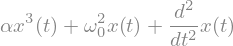

In [2]:
x = Function('x')
t = Symbol('t',real = True)
omega = Symbol('omega0',real=True)
alpha = Symbol('alpha',real=True)
Duff_xt=Derivative(x(t),t,t)+omega**2*x(t)+alpha*x(t)**3
Duff_xt

Выполним масшабирование исходных переменных: $x=A\varphi$, $t=\tau/\omega_0$

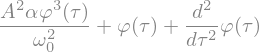

In [3]:
tau = Symbol('tau',real = True)
Phi=Function('varphi')
a=Symbol('A',real = True)
Subs_xt = {x(t):a*Phi(tau),t:tau/omega}#Derivative(x(t),t,t):omega**2*Derivative(a*Phi(tau),tau,tau)}
Duff_new = expand(Duff_xt.subs(Derivative(x(t),t,t),a*omega**2*Derivative(Phi(tau),tau,tau)).subs(Subs_xt)\
                 /(a*omega**2))
#_.subs(Subs_xt).doit()
#Duffing = expand(_/(a*omega**2))
#Duffing = expand(1/a/omega**2*(Duff_xt.subs(Subs_xt).doit()+omega**2*Derivative(a*Phi(tau),tau,tau).doit()))
Duff_new

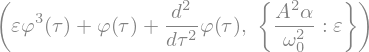

In [4]:
eps=Symbol('varepsilon',real = True)
Subs_eps = {Duff_new.coeff(Phi(tau),3):eps}
Duffing = Duff_new.subs(Subs_eps)
Duffing, Subs_eps

In [17]:
Nexpand=3 # Порядок разложения
phi=[Function(f'phi{i}') for i in range(Nexpand)] # Зададим набор функций
part_sum = [phi[i](tau)*eps**i for i in range(Nexpand)]
Psubs=sym.Add(*part_sum,evaluate=False)
Psubs

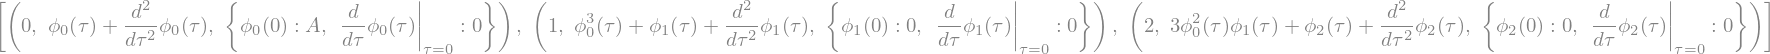

In [18]:
# Определяем уравнения для порядков 0,1,2
eqlst=[collect(sym.simplify(Duffing.subs(Phi(tau),Psubs).expand()),eps).coeff(eps,i)\
       for i in range(Nexpand)]
#И начальные условия к ним в виде коллекции
icslst=[{phi[0](0):a,diff(phi[0](tau),tau).subs(tau,0):0}]+\
       [{phi[i](0):0,diff(phi[i](tau),tau).subs(tau,0):0} for i in range(1,Nexpand)]
[(n,eq,ics) for n,(eq,ics) in enumerate(zip(eqlst,icslst))]
#    print(n,eq,ics)

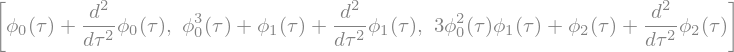

In [19]:
#eqlst=[collect(sym.simplify(Duffing.subs(Phi(tau),Psubs).expand()),eps).coeff(eps,i)\
#       for i in range(Nexpand)]
eqlst

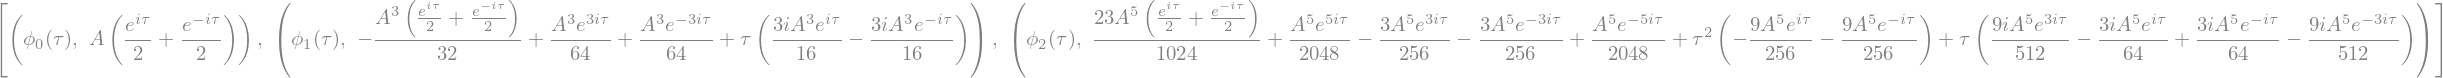

In [20]:
sol0=dsolve(eqlst[0],phi[0](tau),ics=icslst[0])
sollst={sol0.lhs:sol0.rhs.rewrite(exp)}
for i in range(1,Nexpand):
    sol=dsolve(eqlst[i].subs(sollst),phi[i](tau),ics=icslst[i])
    #sollst.update({sol.lhs:collect(trigsimp(expand(sol.rhs),method="old"),t)})
    sollst.update({sol.lhs:sol.rhs.rewrite(exp).collect(tau)})
[(sol,sollst[sol]) for sol in sollst.keys()]


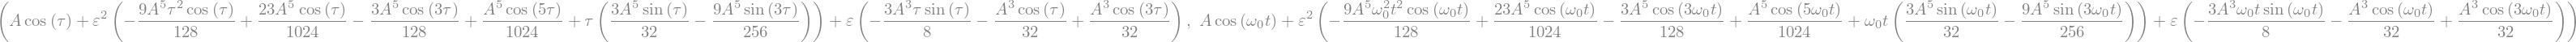

In [21]:
# Преобразуем решения в тригонометрическую форму
sollsttrig=[eps**i*sollst[key].rewrite(cos).expand().collect(tau) \
            for i,key in enumerate(sollst.keys())]
#list(enumerate(sollsttrig))
SolDirect=sum(sollsttrig)
SolDirect, SolDirect.subs(tau,omega*t)

Полученное разложение неравномерно, ибо для любого $\varepsilon>0$ найдется такое $t$, что $\varphi_{i+1}(t)>\varphi_i(t)$.

Сравним полученное разложение для разных значений $\varepsilon\in[10^{-2},10^{-1}]$. 
Амплитуда $a=1.5$, интервал - $10T$, где $T=2pi$.

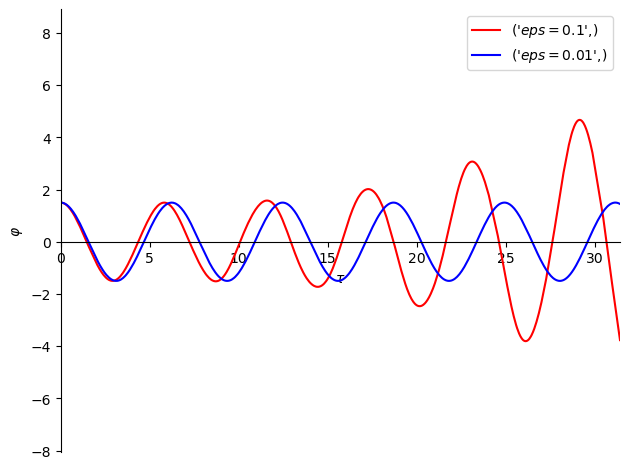

In [39]:
from sympy import pi
from sympy.plotting import plot
SolDira1=SolDirect.subs(a,1.5)
T=5*2*pi
epslst=[10**(-i) for i in range(1,3)]
colorlst=["red","blue"]
pltlst=[SolDira1.subs(eps,epslst[i]) for i in range(len(epslst))]
pic1=plot(*pltlst,(tau,0,T),show=False,\
          line_color='red',\
          ylabel=r'$\varphi$',margin=0.5,xlim=(0,T.evalf()))
#pic2=plot(SolDira1.subs(eps,epslst[1]),(t,0,T),show=False,\
#          label=f'$\\varepsilon={epslst[1]}$',line_color='blue')
#pic3=plot(SolDira1.subs(eps,epslst[2]),(t,0,T),show=False,\
#          label=f'$\\varepsilon={epslst[2]}$',line_color='green')
#pic1.append(pic2[0])
#pic1.append(pic3[0])
for i,color in enumerate(colorlst): 
    pic1[i].line_color = color
    pic1[i].label=f'$eps={epslst[i]}$',
pic1.legend =True #(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pic1.show()

### Метод Линдштеда-Пуанкаре
Ищутся поправки к частоте колебаний такие, чтобы аннулировать секулярные члены в прямом разложении. Выполним масштабирование независимой переменной $\tau=\omega t$. Тогда уравнение (2) примет вид
$$
\omega^2\varphi''+\varphi+\varepsilon\varphi^3=0.\tag{5}
$$

Ищем решение в виде рядов для функции $\varphi$ и частоты $\omega$:
$$
\begin{aligned}
\varphi(t)&=\varphi_0(t)+\varepsilon\varphi_1(t)+\varepsilon^2\varphi_2(t)+\dotsc,\\
\omega&=1+\varepsilon\omega_1+\varepsilon^2\omega_2+\dotsc
\end{aligned}\tag{6}
$$

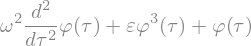

In [23]:
from sympy import solve
tau,Omega=symbols('tau,omega',real=True)
Phi=Function('varphi')
DuffingLP=Omega**2*Derivative(Phi(tau),tau,tau)+Phi(tau)+eps*Phi(tau)**3
DuffingLP
#sym.simplify(Duffing.subs(t,omega*tau))

Строим частичные ряды для $\omega$, $\varphi$ и $\varphi''$

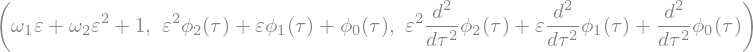

In [24]:
omega=symbols(f'omega0:{Nexpand}')
Omegasubs=sum([omega[i]*eps**i for i in range(Nexpand)]).subs(omega[0],1)
Phisubs=sum([phi[i](tau)*eps**i for i in range(Nexpand)])
D2Phisubs=sum([Derivative(phi[i](tau),tau,tau)*eps**i for i in range(Nexpand)])
Omegasubs,Psubs,D2Phisubs

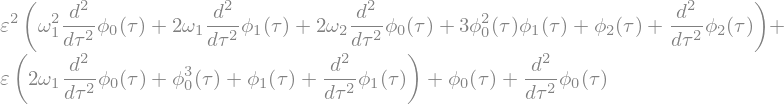

In [25]:
# Определяем уравнения для порядков 0,1,2
DuffingLPsubs=collect(DuffingLP.subs({Derivative(Phi(tau),tau,tau):D2Phisubs,\
                                     Phi(tau):Phisubs,\
                                     Omega:Omegasubs}).expand(),eps)
sum([eps**i*DuffingLPsubs.coeff(eps,i) for i in range(Nexpand)])

Для каждого $\varepsilon$ в степени $0,1,2$ получаем уравнение и записываем начальное условие

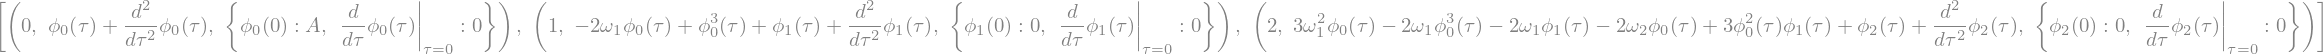

In [26]:
SubsD2Phi={}
EqLPlst=[]
for i in range(Nexpand):
    CurrD2=Derivative(phi[i](tau),tau,tau)
    #print(CurrD2)
    EqLPlst.append(DuffingLPsubs.coeff(eps,i).subs(SubsD2Phi).expand())
    CurrSubs=sym.solve(sym.Eq(EqLPlst[i],0),CurrD2)[0]
    SubsD2Phi.update({CurrD2:CurrSubs})

icsLPlst=[{phi[0](0):a,diff(phi[0](tau),tau).subs(tau,0):0}]+\
       [{phi[i](0):0,diff(phi[i](tau),tau).subs(tau,0):0} for i in range(1,Nexpand)]

[(n,eq,ics) for n,(eq,ics) in enumerate(zip(EqLPlst,icsLPlst))]

Последовательно решаем уравнения с соответствующими начальными условиями и на каждом шаге, начиная со второго, подбираем такую поправку $\omega_k$ к частоте, чтобы в решении отсутствовал секулярный член. Для этого в решении ищем слагаемое, стоящее при $\tau$ в первой степени.

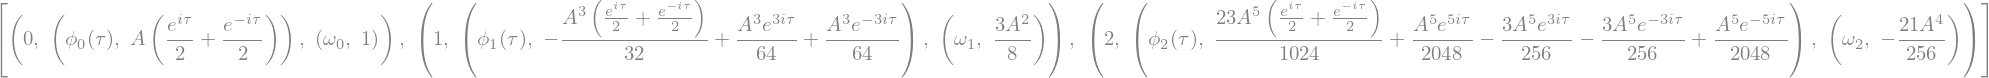

In [27]:
solLP0=dsolve(EqLPlst[0],phi[0](tau),ics=icsLPlst[0])
solLPlst={solLP0.lhs:solLP0.rhs.rewrite(exp)}
Subsomega={omega[0]:1}
solLPlst
for i in range(1,Nexpand):
    eq=EqLPlst[i].subs(solLPlst).subs(Subsomega)
    sol=dsolve(eq,phi[i](tau),ics=icsLPlst[i])
    Subsomega.update({omega[i]:\
                     solve(sol.rhs.collect(tau).coeff(tau,1),omega[i])[0]})
    solLPlst.update({sol.lhs:sol.rhs.subs(Subsomega).expand().rewrite(exp).collect(t)})    

[(n,sol,omega) for n,(sol,omega) in enumerate(zip(solLPlst.items(),Subsomega.items()))]

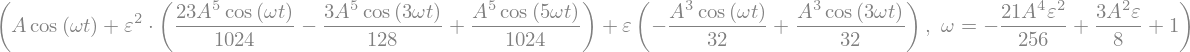

In [28]:
# Преобразуем решения в тригонометрическую форму
solLPlsttrig=[eps**i*solLPlst[key].rewrite(cos).expand().collect(tau) \
            for i,key in enumerate(solLPlst.keys())]
Omegasubs=Omegasubs.subs(Subsomega)
#list(enumerate(sollsttrig))
SolLP=sum(solLPlsttrig).subs(tau,Omegasubs*t)
sum(solLPlsttrig).subs(tau,Omega*t),Eq(Omega,Omegasubs)

In [29]:
# Сравним решение, полученное прямым методом и методом Линдштеда-Пуанкаре 
sym.simplify(SolDirect.subs(tau,t)-series(SolLP,eps,0,3).removeO())

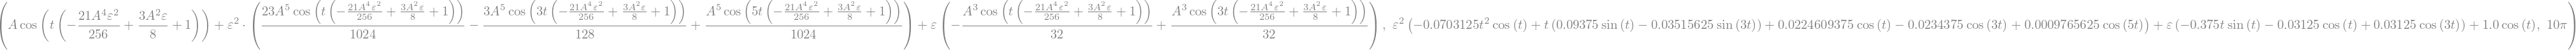

In [38]:
SolLP,SolDira1.subs(tau,t),T

Изобразим решения, полученные прямым методом и методом Л-П

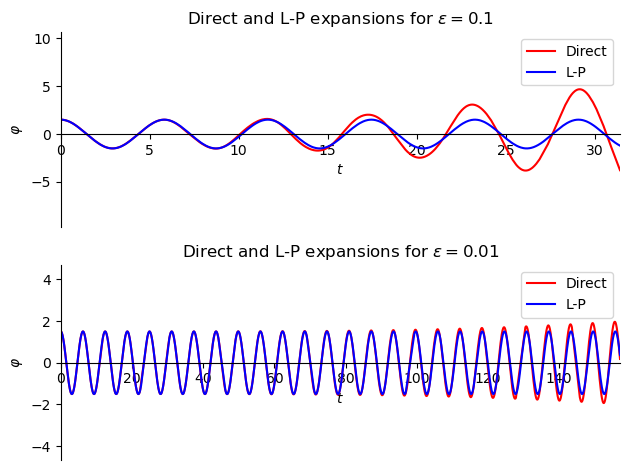

In [40]:
from sympy.plotting import PlotGrid
SolLPa1=SolLP.subs(a,1.5)
plteps1lst=[SolDira1.subs({eps:epslst[0],tau:t}), SolLPa1.subs(eps,epslst[0])]
piceps1=plot(*plteps1lst,(t,0,T),show=False,\
          #label=f'$\\varepsilon={epslst[0]}$',line_color='red',\
          ylabel=r'$\varphi$',margin=0.7,xlim=(0,T.evalf()),\
          title=f'Direct and L-P expansions for $\\varepsilon=${epslst[0]}')
#pic2=plot(SolDira1.subs(eps,epslst[1]),(t,0,T),show=False,\
#          label=f'$\\varepsilon={epslst[1]}$',line_color='blue')
#pic3=plot(SolDira1.subs(eps,epslst[2]),(t,0,T),show=False,\
#          label=f'$\\varepsilon={epslst[2]}$',line_color='green')
#pic1.append(pic2[0])
#pic1.append(pic3[0])
for i,color in enumerate(colorlst): piceps1[i].line_color = color
piceps1[0].label="Direct"
piceps1[1].label="L-P"
piceps1.legend =True #(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#piceps1.show()
plteps2lst=[SolDira1.subs({eps:epslst[1],tau:t}), SolLPa1.subs(eps,epslst[1])]
piceps2=plot(*plteps2lst,(t,0,5*T),show=False,\
          #label=f'$\\varepsilon={epslst[0]}$',line_color='red',\
          ylabel=r'$\varphi$',margin=0.7,xlim=(0,(5*T).evalf()),\
          title=f'Direct and L-P expansions for $\\varepsilon=${epslst[1]}')
#pic2=plot(SolDira1.subs(eps,epslst[1]),(t,0,T),show=False,\
#          label=f'$\\varepsilon={epslst[1]}$',line_color='blue')
#pic3=plot(SolDira1.subs(eps,epslst[2]),(t,0,T),show=False,\
#          label=f'$\\varepsilon={epslst[2]}$',line_color='green')
#pic1.append(pic2[0])
#pic1.append(pic3[0])
for i,color in enumerate(colorlst): piceps2[i].line_color = color
piceps2[0].label="Direct"
piceps2[1].label="L-P"
piceps2.legend =True #(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PlotGrid(2,1,piceps1,piceps2)

======

![Tasks](Lecture2_Tasks.png)